In [1]:
import pandas
import seaborn as sns
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy
import os
sns.set_style('white')
sns.set_palette('Set2')
sns.set_context("paper", font_scale=1.8)

/home/davidsl/miniconda3/envs/tesis/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/davidsl/miniconda3/envs/tesis/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/davidsl/miniconda3/envs/tesis/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/davidsl/miniconda3/envs/tesis/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/davidsl/miniconda3/envs/tesis/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

In [3]:
%%bash
pwd

/home/davidsl/Escritorio/mineria/Tesis/argument_mining_tesis/notebooks


In [5]:
word_att_classification = pandas.read_csv('../tmp/18-12-12-14-46_batch_64_lstm_100_dropout_0.3-0.3_linear_word_0.7348_test', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2], engine='python')
# test 0.7348
no_att_classification = pandas.read_csv('../tmp/18-12-06-01-54_batch_64_lstm_150_dropout_0.5-0.5_NoAttention_0.7370_test', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2], engine='python')

context_att_classification = pandas.read_csv('../tmp/18-11-28-12-29_batch_64_lstm_150_dropout_0.5-0.5_sigmoid_0.7088_test', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2], engine='python')

def extract_component_label(full_label):
    """Given a full label, extracts the component classification label"""
    return full_label.lower()

word_att_classification['true_component'] = word_att_classification['true'].apply(extract_component_label)
word_att_classification['predicted_component'] = word_att_classification['prediction'].apply(extract_component_label)
word_att_classification.true_component.unique()

context_att_classification['true_component'] = context_att_classification['true'].apply(extract_component_label)
context_att_classification['predicted_component'] = context_att_classification['prediction'].apply(extract_component_label)
context_att_classification.true_component.unique()

no_att_classification['true_component'] = no_att_classification['true'].apply(extract_component_label)
no_att_classification['predicted_component'] = no_att_classification['prediction'].apply(extract_component_label)
no_att_classification.true_component.unique()

array(['o', 'claim', 'majorclaim', 'premise'], dtype=object)

In [23]:
context_att_classification[:3]

,true,prediction,true_component,predicted_component
0,O,O,o,o
1,O,O,o,o
2,O,O,o,o


In [6]:
print("Word attention\n")
print(sklearn.metrics.classification_report(word_att_classification.true_component, word_att_classification.predicted_component))
print("\n")

print("Context attention\n")
print(sklearn.metrics.classification_report(context_att_classification.true_component, context_att_classification.predicted_component))
print("\n")

print("No attention\n")
print(sklearn.metrics.classification_report(no_att_classification.true_component, no_att_classification.predicted_component))




Word attention

              precision    recall  f1-score   support

       claim       0.48      0.49      0.49      4238
  majorclaim       0.72      0.70      0.71      2134
           o       0.89      0.87      0.88      9438
     premise       0.85      0.87      0.86     13727

   micro avg       0.80      0.80      0.80     29537
   macro avg       0.74      0.73      0.73     29537
weighted avg       0.80      0.80      0.80     29537



Context attention

              precision    recall  f1-score   support

       claim       0.43      0.52      0.47      4238
  majorclaim       0.67      0.67      0.67      2134
           o       0.88      0.84      0.86      9438
     premise       0.85      0.82      0.84     13727

   micro avg       0.77      0.77      0.77     29537
   macro avg       0.71      0.71      0.71     29537
weighted avg       0.79      0.77      0.78     29537



No attention

              precision    recall  f1-score   support

       claim       0.4

Word attention

Observed Agreement: 80.17%


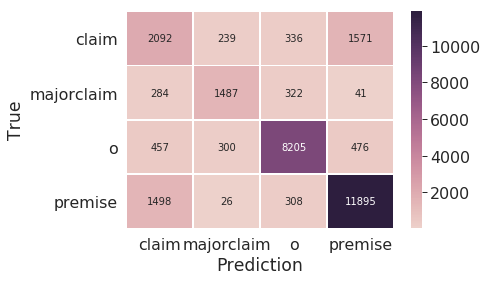

0.8016724785861801


Context attention

Observed Agreement: 77.33%


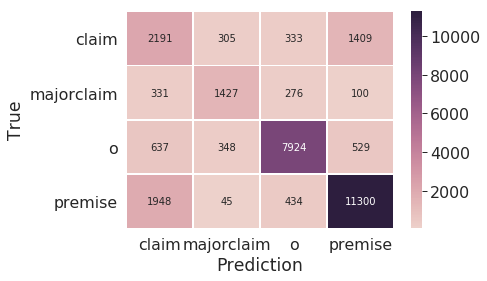

0.7733351389782307


No attention

Observed Agreement: 79.88%


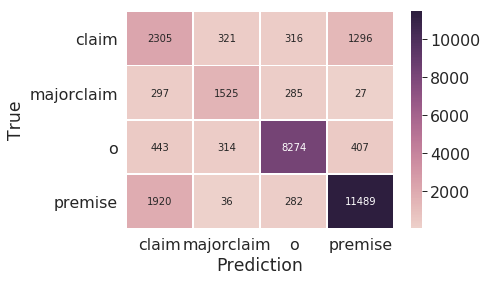

0.7987608761891865


In [7]:
def show_confusion_matrix(labels1, labels2, identifier1=None, identifier2=None):
    label_names = sorted(list(set(labels1)))
    matrix = metrics.confusion_matrix(labels1, labels2, labels=label_names)
    observed_agreement = numpy.trace(matrix) / float(numpy.sum(matrix)) * 100
    print('Observed Agreement: {0:.2f}%'.format(observed_agreement))
    colormap = plt.cm.cubehelix_r
    figure = sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5,
                         xticklabels=label_names, yticklabels=label_names,
                         cmap=sns.cubehelix_palette(8,  as_cmap=True))
    if identifier1 is not None:
        figure.set(ylabel=identifier1)
    if identifier2 is not None:
        figure.set(xlabel=identifier2)
    plt.show()


print("Word attention\n")
show_confusion_matrix(word_att_classification.true_component, word_att_classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(word_att_classification.true_component, word_att_classification.predicted_component))
print("\n")

print("Context attention\n")
show_confusion_matrix(context_att_classification.true_component, context_att_classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(context_att_classification.true_component, context_att_classification.predicted_component))
print("\n")

print("No attention\n")
show_confusion_matrix(no_att_classification.true_component, no_att_classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(no_att_classification.true_component, no_att_classification.predicted_component))